In [138]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# **1.Data Collection**

In [139]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-25,22.420633,22.891863,22.368775,22.889607,207178000
2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000
2016-01-27,21.063311,21.787066,21.045273,21.654040,533478800
2016-01-28,21.214369,21.311321,20.831072,21.146729,222715200
2016-01-29,21.947140,21.947140,21.272988,21.372195,257666000
...,...,...,...,...,...
2026-01-16,255.529999,258.899994,254.929993,257.899994,72142800
2026-01-20,246.699997,254.789993,243.419998,252.729996,80267500


# **2. Data Exploration and Visualization**

In [140]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-25,22.420633,22.891863,22.368775,22.889607,207178000
2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000
2016-01-27,21.063311,21.787066,21.045273,21.654040,533478800
2016-01-28,21.214369,21.311321,20.831072,21.146729,222715200
2016-01-29,21.947140,21.947140,21.272988,21.372195,257666000
...,...,...,...,...,...
2026-01-16,255.529999,258.899994,254.929993,257.899994,72142800
2026-01-20,246.699997,254.789993,243.419998,252.729996,80267500


In [141]:
type(df)

pandas.core.frame.DataFrame

In [142]:
df.shape

(2515, 5)

In [143]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [144]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,115.658763,116.807515,114.401376,115.556386,1.006098e+08
std,73.838599,74.546407,73.071204,73.782887,5.688993e+07
min,20.604078,20.907414,20.405656,20.526533,1.791060e+07
25%,41.894062,42.148718,41.539682,41.870476,6.091975e+07
50%,121.980370,123.203190,120.244198,121.700994,8.810510e+07
75%,172.178253,174.263578,171.052837,172.202629,1.228579e+08
max,286.190002,288.619995,283.299988,286.200012,5.334788e+08


In [145]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [146]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-25,22.420633,22.891863,22.368775,22.889607,207178000
2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000
2016-01-27,21.063311,21.787066,21.045273,21.654040,533478800
2016-01-28,21.214369,21.311321,20.831072,21.146729,222715200
2016-01-29,21.947140,21.947140,21.272988,21.372195,257666000


In [147]:
df = df.reset_index()

In [148]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2016-01-25,22.420633,22.891863,22.368775,22.889607,207178000
1,2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000
2,2016-01-27,21.063311,21.787066,21.045273,21.654040,533478800
3,2016-01-28,21.214369,21.311321,20.831072,21.146729,222715200
4,2016-01-29,21.947140,21.947140,21.272988,21.372195,257666000


Text(0, 0.5, 'Close price')

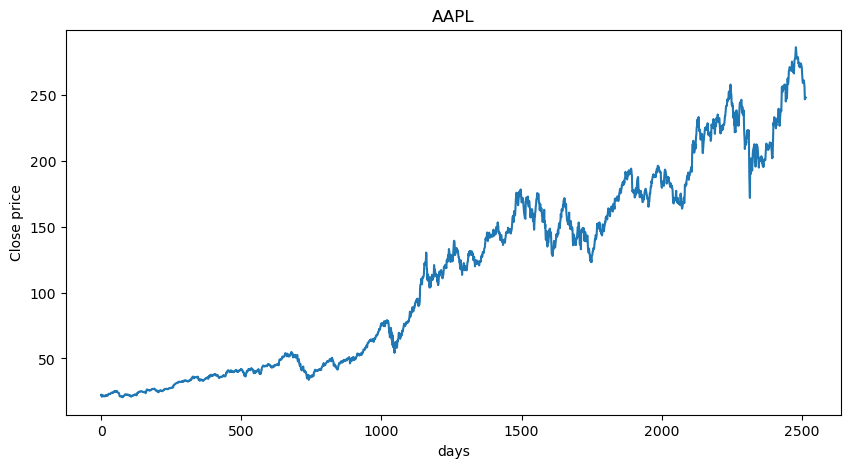

In [149]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('days')
plt.ylabel('Close price')

# *3. Feature Engineering*

# 100 days Moving Average

In [150]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2016-01-25,22.420633,22.891863,22.368775,22.889607,207178000,NaN
1,2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000,NaN
2,2016-01-27,21.063311,21.787066,21.045273,21.654040,533478800,NaN
3,2016-01-28,21.214369,21.311321,20.831072,21.146729,222715200,NaN
4,2016-01-29,21.947140,21.947140,21.272988,21.372195,257666000,NaN


In [151]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2016-01-25,22.420633,22.891863,22.368775,22.889607,207178000,NaN
1,2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000,NaN
2,2016-01-27,21.063311,21.787066,21.045273,21.654040,533478800,NaN
3,2016-01-28,21.214369,21.311321,20.831072,21.146729,222715200,NaN
4,2016-01-29,21.947140,21.947140,21.272988,21.372195,257666000,NaN
...,...,...,...,...,...,...,...
98,2016-06-14,22.227951,22.460586,22.066020,22.196021,127727600,NaN
99,2016-06-15,22.154970,22.444623,22.129882,22.310060,117780800,22.721465
100,2016-06-16,22.248486,22.294099,21.910937,21.997604,125307200,22.719744


Text(0, 0.5, 'Price')

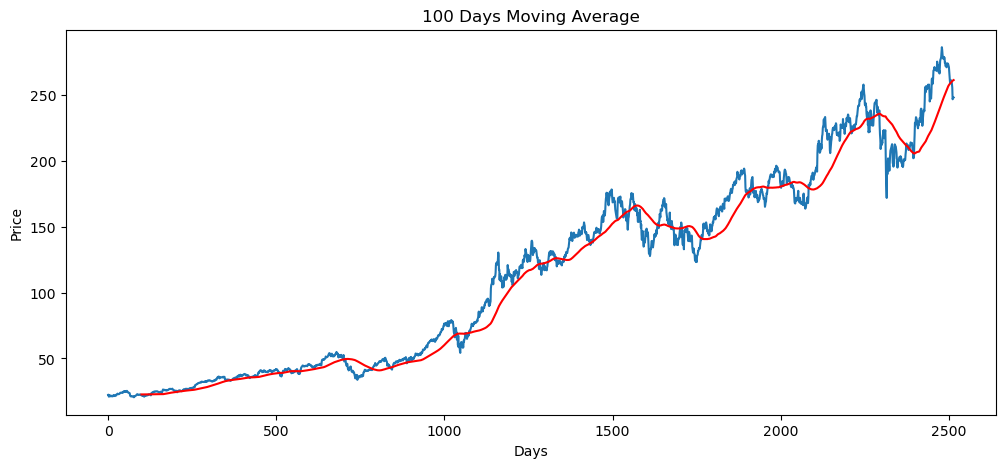

In [152]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

# 200 days Movings Average

In [153]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2016-01-25,22.420633,22.891863,22.368775,22.889607,207178000,NaN,NaN
1,2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000,NaN,NaN
2,2016-01-27,21.063311,21.787066,21.045273,21.654040,533478800,NaN,NaN
3,2016-01-28,21.214369,21.311321,20.831072,21.146729,222715200,NaN,NaN
4,2016-01-29,21.947140,21.947140,21.272988,21.372195,257666000,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-11-03,25.314209,25.689900,25.249673,25.579268,107730400,24.448802,NaN
199,2016-11-04,25.086033,25.411018,24.917779,25.014583,123348000,24.478113,23.599789
200,2016-11-07,25.447895,25.470943,25.228933,25.371834,130240000,24.510107,23.614925


Text(0, 0.5, 'Price')

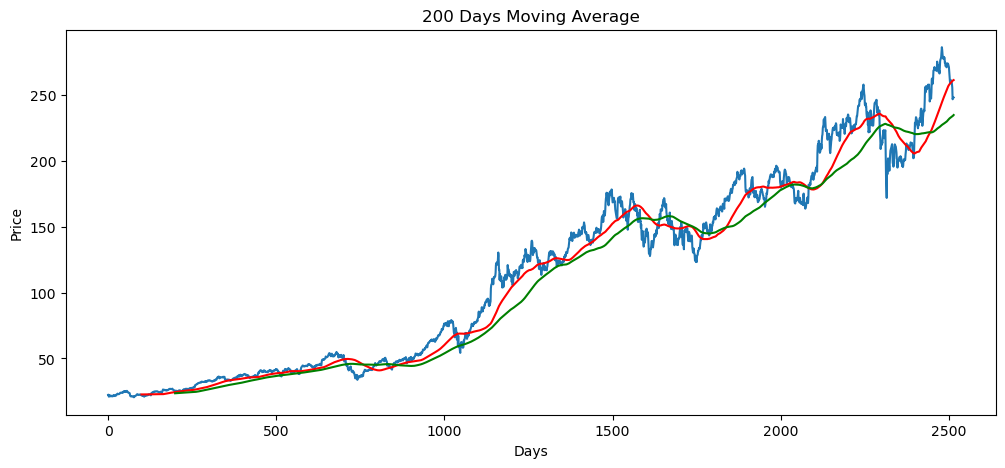

In [154]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

In [155]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2016-01-25,22.420633,22.891863,22.368775,22.889607,207178000,NaN,NaN
1,2016-01-26,22.544640,22.745307,22.111740,22.531112,300308000,NaN,NaN
2,2016-01-27,21.063311,21.787066,21.045273,21.654040,533478800,NaN,NaN
3,2016-01-28,21.214369,21.311321,20.831072,21.146729,222715200,NaN,NaN
4,2016-01-29,21.947140,21.947140,21.272988,21.372195,257666000,NaN,NaN
...,...,...,...,...,...,...,...,...
2510,2026-01-16,255.529999,258.899994,254.929993,257.899994,72142800,260.591945,233.751891
2511,2026-01-20,246.699997,254.789993,243.419998,252.729996,80267500,260.768066,233.869756
2512,2026-01-21,247.649994,251.559998,245.179993,248.699997,54641700,260.941898,234.095518


# Calculating % changed in each trading session

In [156]:
df['Percentage_Changed'] = df.Close.pct_change()
df[['Close', 'Percentage_Changed']]

Price,Close,Percentage_Changed
Ticker,AAPL,
0,22.420633,NaN
1,22.544640,0.005531
2,21.063311,-0.065706
3,21.214369,0.007172
4,21.947140,0.034541
...,...,...
2510,255.529999,-0.010379
2511,246.699997,-0.034556
2512,247.649994,0.003851


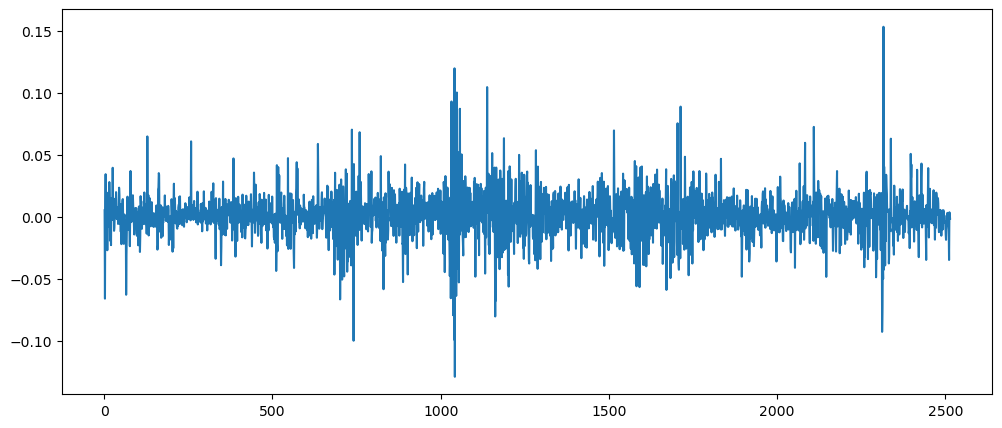

In [157]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage_Changed'])

# *4. Data Preprocessing*

In [158]:
df.shape

(2515, 9)

In [159]:
#Slitting data {train , test}, train = 70% and 30% for testing

data_train = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_test = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

print(data_train)
print(data_test)

Ticker        AAPL
0        22.420633
1        22.544640
2        21.063311
3        21.214369
4        21.947140
...            ...
1755    131.427246
1756    132.757187
1757    133.919678
1758    133.200500
1759    133.259628

[1760 rows x 1 columns]
Ticker        AAPL
1760    135.820953
1761    139.012848
1762    140.411697
1763    139.751694
1764    141.820450
...            ...
2510    255.529999
2511    246.699997
2512    247.649994
2513    248.350006
2514    248.039993

[755 rows x 1 columns]


In [160]:
# Scaling Down the data between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [161]:
data_train_into_array = scaler.fit_transform(data_train)
data_train_into_array

array([[0.01152152],
       [0.01230803],
       [0.00291269],
       ...,
       [0.71870558],
       [0.71414419],
       [0.7145192 ]])

In [162]:
type(data_train)


pandas.core.frame.DataFrame

In [163]:
type(data_train_into_array)

numpy.ndarray

In [164]:
data_train_into_array.shape

(1760, 1)

# *5. Sequence Creation*

In [165]:
x_train = []
y_train = []

for i in range(100, data_train_into_array.shape[0]):
    x_train.append(data_train_into_array[i-100: i])
    y_train.append(data_train_into_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [166]:
x_train

array([[[0.01152152],
        [0.01230803],
        [0.00291269],
        ...,
        [0.01012582],
        [0.01029943],
        [0.00983655]],

       [[0.01230803],
        [0.00291269],
        [0.00387078],
        ...,
        [0.01029943],
        [0.00983655],
        [0.01042967]],

       [[0.00291269],
        [0.00387078],
        [0.00851838],
        ...,
        [0.00983655],
        [0.01042967],
        [0.00721828]],

       ...,

       [[0.9124828 ],
        [0.91435402],
        [0.929949  ],
        ...,
        [0.70339716],
        [0.7028973 ],
        [0.71133246]],

       [[0.91435402],
        [0.929949  ],
        [0.88996376],
        ...,
        [0.7028973 ],
        [0.71133246],
        [0.71870558]],

       [[0.929949  ],
        [0.88996376],
        [0.8759909 ],
        ...,
        [0.71133246],
        [0.71870558],
        [0.71414419]]])

In [167]:
y_train

array([0.01042967, 0.00721828, 0.00688561, ..., 0.71870558, 0.71414419,
       0.7145192 ])

In [168]:
x_train.shape

(1660, 100, 1)

In [169]:
y_train.shape

(1660,)

In [170]:
x_train.ndim

3

# *6. Model Building*

In [171]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [172]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# *7. Model Training*

In [173]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0149
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 6.6481e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 6.4863e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 6.3018e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.9700e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 6.4232e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 6.2532e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 5.7903e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 5.2147e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 4.9708e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 5.4176e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 4.7087e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 5.2057e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.4196e-04
Epoch 15/50
52/52 ━

In [174]:
 model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [175]:
# Save the trained model
model.save('stock_prediction_model.keras')

# *8. Preparing test Data

In [176]:
data_train.tail(100)

Ticker,AAPL
1660,160.921310
1661,158.718262
1662,156.289001
1663,154.626923
1664,155.354706
...,...
1755,131.427246
1756,132.757187
1757,133.919678
1758,133.200500


In [177]:
data_test

Ticker,AAPL
1760,135.820953
1761,139.012848
1762,140.411697
1763,139.751694
1764,141.820450
...,...
2510,255.529999
2511,246.699997
2512,247.649994
2513,248.350006


In [178]:
past_100_days = data_train.tail(100)

In [179]:
past_100_days

Ticker,AAPL
1660,160.921310
1661,158.718262
1662,156.289001
1663,154.626923
1664,155.354706
...,...
1755,131.427246
1756,132.757187
1757,133.919678
1758,133.200500


In [180]:
final_df = pd.concat([past_100_days, data_test], ignore_index=True)
final_df

Ticker,AAPL
0,160.921310
1,158.718262
2,156.289001
3,154.626923
4,155.354706
...,...
850,255.529999
851,246.699997
852,247.649994
853,248.350006


In [181]:
input_data = scaler.fit_transform(final_df)

In [182]:
input_data.shape

(855, 1)

In [183]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [184]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [185]:
x_test[0].shape

(100, 1)

In [186]:
x_test

array([[[0.23161266],
        [0.21809935],
        [0.20319848],
        ...,
        [0.06598698],
        [0.06157561],
        [0.06193829]],

       [[0.21809935],
        [0.20319848],
        [0.19300343],
        ...,
        [0.06157561],
        [0.06193829],
        [0.07764924]],

       [[0.20319848],
        [0.19300343],
        [0.19746759],
        ...,
        [0.06193829],
        [0.07764924],
        [0.09722804]],

       ...,

       [[0.65697181],
        [0.6696567 ],
        [0.6670829 ],
        ...,
        [0.82837303],
        [0.81193419],
        [0.75777172]],

       [[0.6696567 ],
        [0.6670829 ],
        [0.65225326],
        ...,
        [0.81193419],
        [0.75777172],
        [0.76359892]],

       [[0.6670829 ],
        [0.65225326],
        [0.70587306],
        ...,
        [0.75777172],
        [0.76359892],
        [0.76789273]]])

# *9. Making Predictions

In [187]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [188]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()


In [189]:
#y_predicted
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

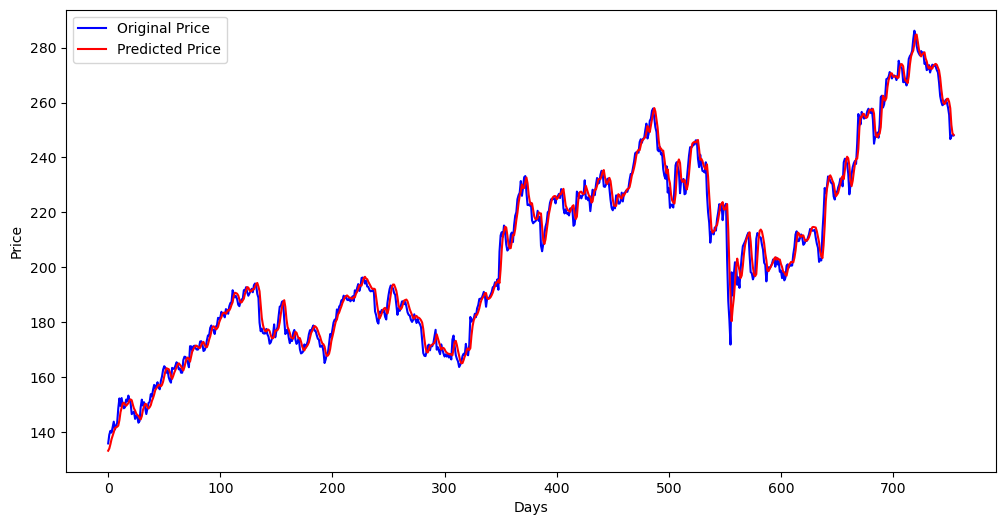

In [190]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(140.0, 220.0)

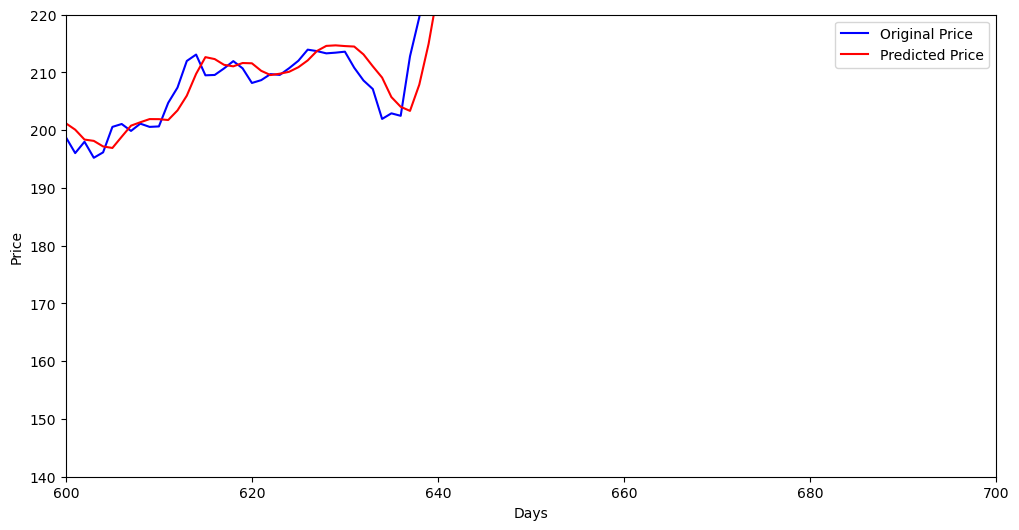

In [196]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(600, 700)
plt.ylim(140, 220)

# *10. Model Evalution*

In [197]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [198]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 15.729667249696316


In [199]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.966064453547914


In [200]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9862884071473599
